<a href="https://colab.research.google.com/github/Anjanapn23/Prediction-using-Supervised-ML---GRIP-Internship/blob/main/Task_1_Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing all the libraries that are required**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

**Loading the data from remote link**

In [2]:
url = "http://bit.ly/w-data"
ds = pd.read_csv(url)
ds.shape
(25,2)
ds.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Default statistical calculations**

In [3]:
ds.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Visualizations**

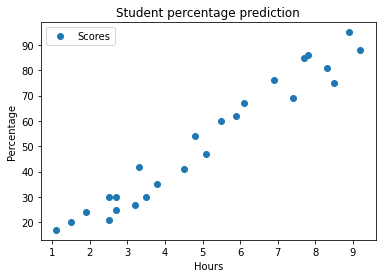

In [4]:
ds.plot(x= 'Hours' , y= 'Scores' , style= 'o')
plt.title('Student percentage prediction')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

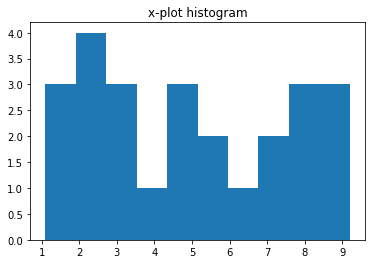

In [5]:
plt.hist(ds['Hours'], bins = 10)
plt.title('x-plot histogram')
plt.show()

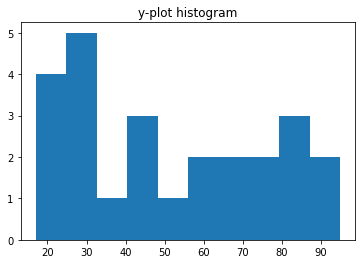

In [6]:
plt.hist(ds['Scores'], bins = 10)
plt.title('y-plot histogram')
plt.show()

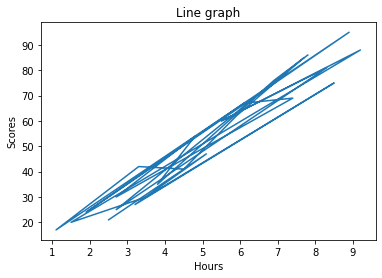

In [7]:
plt.plot(ds['Hours'], ds['Scores'])
plt.title('Line graph')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

**Data preparation**

Dividing data into attributes and labels and splitting them into text and training set

In [8]:
X = ds.iloc[:, :-1].values  
y = ds.iloc[:, 1].values

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Training the model**

In [10]:
from sklearn .linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)


2.018160041434662
[9.91065648]


Plotting the regression line

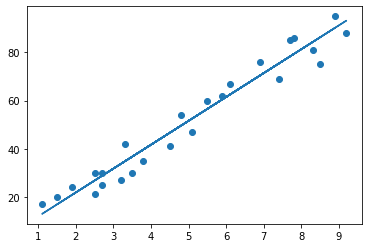

In [11]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**Prediction making**

In [12]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
y_pred = regressor.predict(X_test)

**Actual vs Predicted value**

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Predicted score if a student studies for 9.25 hours/ day**

In [15]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**Model evaluation**

Mean absolute error

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
